# 📧 Email Classification System for Organizational Efficiency

## Using the Enron Email Dataset

---

### 🎯 Problem Statement
In many organizations, employees receive a high volume of emails daily, leading to significant time spent sorting and prioritizing these communications. This process can be inefficient and detract from productivity, especially when critical emails are missed or delayed in response due to manual sorting errors.

### 🎯 Objective
To develop a Natural Language Processing (NLP) model that automatically sorts incoming emails into predefined categories such as **"Urgent"**, **"Financial"**, **"HR"**, and **"General Queries"**. This model aims to improve productivity by reducing the time employees spend managing their email inboxes and ensuring that important messages are promptly addressed.

### 📋 Project Structure (Tasks)

| Task | Description |
|------|-------------|
| **Task 1** | Simulation of Dataset and Loading Dataset |
| **Task 2 & 3** | Text Preprocessing and Feature Extraction |
| **Task 4 & 5** | Model Training and Model Evaluation |

### 🛠️ Tech Stack
- **Dataset**: Enron Email Dataset (Kaggle)
- **Libraries**: pandas, numpy, scikit-learn, nltk, matplotlib, seaborn
- **Model**: Logistic Regression
- **Categories**: Urgent, Financial, HR, General (4 Classes)

---

# 🏁 Milestone 1: Data Collection & Preparation

This milestone covers:
- Importing required libraries
- Downloading and loading the Enron Email Dataset from Kaggle
- Data inspection and preparation
- Handling missing values and duplicates
- Checking for outliers in email length

## Activity 1.1: Importing the Libraries

Import all necessary libraries for:
- **Data manipulation**: pandas, numpy
- **Visualization**: matplotlib, seaborn
- **NLP**: nltk (stopwords, lemmatization)
- **Machine Learning**: scikit-learn (TF-IDF, Logistic Regression, metrics)
- **Model saving**: pickle

In [1]:
# Activity 1.1: Importing the Libraries

# Data Manipulation
import pandas as pd
import numpy as np
import re
import string

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model Saving
import pickle

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print('✅ All libraries imported successfully!')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


✅ All libraries imported successfully!


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Activity 1.2: Creating the Dataset

Download the Enron Email Dataset from Kaggle using the Kaggle API.

**Steps:**
1. Upload your `kaggle.json` file (get it from Kaggle → Account → Create New API Token)
2. Download and extract the dataset

In [2]:
# Activity 1.2: Creating the Dataset - Download from Kaggle

# Step 1: Install Kaggle API
!pip install -q kaggle

# Step 2: Upload your kaggle.json file
from google.colab import files
print('📁 Please upload your kaggle.json file:')
uploaded = files.upload()

# Step 3: Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download Enron Email Dataset from Kaggle
print('\n📥 Downloading Enron Email Dataset...')
!kaggle datasets download -d wcukierski/enron-email-dataset

# Step 5: Unzip the dataset
!unzip -q -o enron-email-dataset.zip

print('\n✅ Enron Email Dataset downloaded and extracted successfully!')

📁 Please upload your kaggle.json file:


Saving kaggle.json to kaggle.json

📥 Downloading Enron Email Dataset...
Dataset URL: https://www.kaggle.com/datasets/wcukierski/enron-email-dataset
License(s): copyright-authors
 78% 280M/358M [00:00<00:00, 771MB/s] 
100% 358M/358M [00:00<00:00, 604MB/s]

✅ Enron Email Dataset downloaded and extracted successfully!


## Activity 1.3: Read & Inspect the Dataset

Load the `emails.csv` file and inspect its structure using:
- `head()` - View first few rows
- `info()` - Data types and non-null counts
- `shape` - Dimensions of the dataset

In [3]:
# Activity 1.3: Read & Inspect the Dataset

# Load the Enron email dataset
df_raw = pd.read_csv('emails.csv')

# Display basic information
print('=' * 60)
print('📊 DATASET OVERVIEW')
print('=' * 60)

print(f'\n📐 Shape: {df_raw.shape[0]:,} rows × {df_raw.shape[1]} columns')
print('\n📋 Columns:', df_raw.columns.tolist())
print('\n📝 Data Types:')
print(df_raw.dtypes)
print('\n🔍 First 5 Rows:')
df_raw.head()

📊 DATASET OVERVIEW

📐 Shape: 517,401 rows × 2 columns

📋 Columns: ['file', 'message']

📝 Data Types:
file       object
message    object
dtype: object

🔍 First 5 Rows:


,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [4]:
# Activity 1.3 (continued): Dataset Info

print('=' * 60)
print('📋 DATASET INFO')
print('=' * 60)
df_raw.info()

📋 DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB


## Activity 1.4: Data Preparation

Extract the raw email body text from the 'message' column.

The raw email contains headers (From, To, Subject, Date) and the actual body. We need to:
1. Extract only the body text (after the headers)
2. Create category labels using rule-based classification:
   - **Spam**: Contains keywords like "winner", "claim", "verify account", "click here"
   - **Promotion**: Contains keywords like "offer", "discount", "sale", "promo", "deal"
   - **Important**: Default category for business emails

In [ ]:
# Activity 1.4: Data Preparation - Extract Email Body & Create Categories

def extract_email_body(message):
    """
    Extract the body content from raw email message.
    Email body starts after the headers (separated by double newline).
    """
    try:
        if pd.isna(message):
            return ''
        parts = str(message).split('\n\n', 1)
        if len(parts) > 1:
            return parts[1].strip()
        return str(message).strip()
    except:
        return ''

def classify_email(text):
    """
    Rule-based classification of emails into 4 categories for organizational efficiency:
    - Urgent: Time-sensitive, critical business matters
    - Financial: Money, budget, invoice, payment related
    - HR: Human resources, employee, hiring, benefits related
    - General: Default category for other business communications
    """
    if pd.isna(text) or text == '':
        return 'General'

    text_lower = str(text).lower()

    # Urgent indicators - time-sensitive, critical matters
    urgent_keywords = [
        'urgent', 'asap', 'immediately', 'critical', 'emergency', 'deadline',
        'time sensitive', 'priority', 'important', 'action required',
        'respond immediately', 'needed today', 'by eod', 'end of day',
        'right away', 'as soon as possible', 'cannot wait', 'pressing'
    ]
    if any(keyword in text_lower for keyword in urgent_keywords):
        return 'Urgent'

    # Financial indicators - money, budget, payments
    financial_keywords = [
        'invoice', 'payment', 'budget', 'expense', 'revenue', 'cost',
        'financial', 'fiscal', 'quarterly', 'annual report', 'earnings',
        'profit', 'loss', 'balance', 'account', 'billing', 'payroll',
        'reimbursement', 'funding', 'investment', 'tax', 'audit',
        'contract', 'purchase order', 'vendor', 'price', 'quote'
    ]
    if any(keyword in text_lower for keyword in financial_keywords):
        return 'Financial'

    # HR indicators - human resources, employee matters
    hr_keywords = [
        'hr', 'human resources', 'employee', 'hiring', 'recruitment',
        'interview', 'candidate', 'resume', 'onboarding', 'training',
        'benefits', 'vacation', 'leave', 'performance review', 'salary',
        'compensation', 'termination', 'policy', 'handbook', 'compliance',
        'workplace', 'team building', 'staff', 'personnel', 'promotion'
    ]
    if any(keyword in text_lower for keyword in hr_keywords):
        return 'HR'

    # Default: General business communications
    return 'General'

# Create a copy of the dataframe
df = df_raw.copy()

# Extract email body
print('📧 Extracting email body text...')
df['email_body'] = df['message'].apply(extract_email_body)

# Classify emails into 4 categories
print('🏷️ Classifying emails into 4 categories (Urgent, Financial, HR, General)...')
df['category'] = df['email_body'].apply(classify_email)

print('\n✅ Data preparation complete!')
print(f'\n📊 Category Distribution (Full Dataset):')
print(df['category'].value_counts())
print(f'\n📈 Category Percentages:')
print((df['category'].value_counts(normalize=True) * 100).round(2))

📧 Extracting email body text...
🏷️ Classifying emails into categories...

✅ Data preparation complete!

📊 Category Distribution (Full Dataset):
category
Important    357252
Promotion    119363
Spam          40786
Name: count, dtype: int64


## Activity 1.5: Handling Missing Values

Check for and handle any missing values in the dataset.

In [6]:
# Activity 1.5: Handling Missing Values

print('=' * 60)
print('🔍 MISSING VALUES ANALYSIS')
print('=' * 60)

print('\n📊 Missing Values per Column:')
print(df.isnull().sum())

print(f'\n📈 Total Missing Values: {df.isnull().sum().sum()}')

# Remove rows with empty email body
initial_count = len(df)
df = df[df['email_body'].str.len() > 0]
df = df.dropna(subset=['email_body'])

print(f'\n🗑️ Removed {initial_count - len(df):,} rows with empty email body')
print(f'✅ Remaining rows: {len(df):,}')

🔍 MISSING VALUES ANALYSIS

📊 Missing Values per Column:
file          0
message       0
email_body    0
category      0
dtype: int64

📈 Total Missing Values: 0

🗑️ Removed 0 rows with empty email body
✅ Remaining rows: 517,401


## Activity 1.6: Handling Duplicates

Identify and remove duplicate emails to ensure data quality.

In [7]:
# Activity 1.6: Handling Duplicates

print('=' * 60)
print('🔄 DUPLICATE ANALYSIS')
print('=' * 60)

duplicates = df.duplicated(subset=['email_body']).sum()
print(f'\n📊 Duplicate emails found: {duplicates:,}')

initial_count = len(df)
df = df.drop_duplicates(subset=['email_body'], keep='first')

print(f'🗑️ Removed {initial_count - len(df):,} duplicate emails')
print(f'✅ Remaining unique emails: {len(df):,}')

🔄 DUPLICATE ANALYSIS

📊 Duplicate emails found: 269,529
🗑️ Removed 269,529 duplicate emails
✅ Remaining unique emails: 247,872


## Activity 1.7: Checking for Outliers

Analyze email length (characters and word count) to identify potential outliers.

In [8]:
# Activity 1.7: Checking for Outliers (Email Length)

df['char_count'] = df['email_body'].apply(len)
df['word_count'] = df['email_body'].apply(lambda x: len(str(x).split()))

print('=' * 60)
print('📏 EMAIL LENGTH ANALYSIS')
print('=' * 60)

print('\n📊 Character Count Statistics:')
print(df['char_count'].describe())

print('\n📊 Word Count Statistics:')
print(df['word_count'].describe())

# Identify outliers using IQR method
Q1 = df['char_count'].quantile(0.25)
Q3 = df['char_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['char_count'] < lower_bound) | (df['char_count'] > upper_bound)]
print(f'\n⚠️ Outliers detected (IQR method): {len(outliers):,} emails')

# Remove very short emails
initial_count = len(df)
df = df[df['char_count'] >= 50]
print(f'🗑️ Removed {initial_count - len(df):,} very short emails (< 50 chars)')
print(f'✅ Final dataset size: {len(df):,} emails')

📏 EMAIL LENGTH ANALYSIS

📊 Character Count Statistics:
count    2.478720e+05
mean     1.892060e+03
std      9.097166e+03
min      1.000000e+00
25%      2.880000e+02
50%      7.730000e+02
75%      1.782000e+03
max      2.011422e+06
Name: char_count, dtype: float64

📊 Word Count Statistics:
count    247872.000000
mean        266.368234
std         837.991129
min           1.000000
25%          45.000000
50%         116.000000
75%         262.000000
max       64024.000000
Name: word_count, dtype: float64

⚠️ Outliers detected (IQR method): 22,434 emails
🗑️ Removed 9,502 very short emails (< 50 chars)
✅ Final dataset size: 238,370 emails


---
# 📊 Milestone 2: Exploratory Data Analysis (EDA)

This milestone covers:
- Descriptive statistics
- Visual analysis of category distribution
- Univariate and bivariate analysis

## Activity 2.1: Descriptive Statistics

Generate summary statistics for the dataset.

In [9]:
# Activity 2.1: Descriptive Statistics

print('=' * 60)
print('📈 DESCRIPTIVE STATISTICS')
print('=' * 60)

print(f'\n📊 Dataset Shape: {df.shape}')
print(f'\n📋 Category Distribution:')
print(df['category'].value_counts())
print(f'\n📊 Category Percentages:')
print(df['category'].value_counts(normalize=True).round(4) * 100)

print('\n📊 Numerical Statistics:')
df[['char_count', 'word_count']].describe()

📈 DESCRIPTIVE STATISTICS

📊 Dataset Shape: (238370, 6)

📋 Category Distribution:
category
Important    159072
Promotion     57041
Spam          22257
Name: count, dtype: int64

📊 Category Percentages:
category
Important    66.73
Promotion    23.93
Spam          9.34
Name: proportion, dtype: float64

📊 Numerical Statistics:


,char_count,word_count
count,2.383700e+05,238370.000000
mean,1.966331e+03,276.786101
std,9.268953e+03,852.871808
min,5.000000e+01,1.000000
25%,3.290000e+02,51.000000
50%,8.220000e+02,124.000000
75%,1.849000e+03,271.000000
max,2.011422e+06,64024.000000


## Activity 2.2: Visual Analysis – Category Distribution

Visualize the distribution of email categories using bar charts and pie charts.

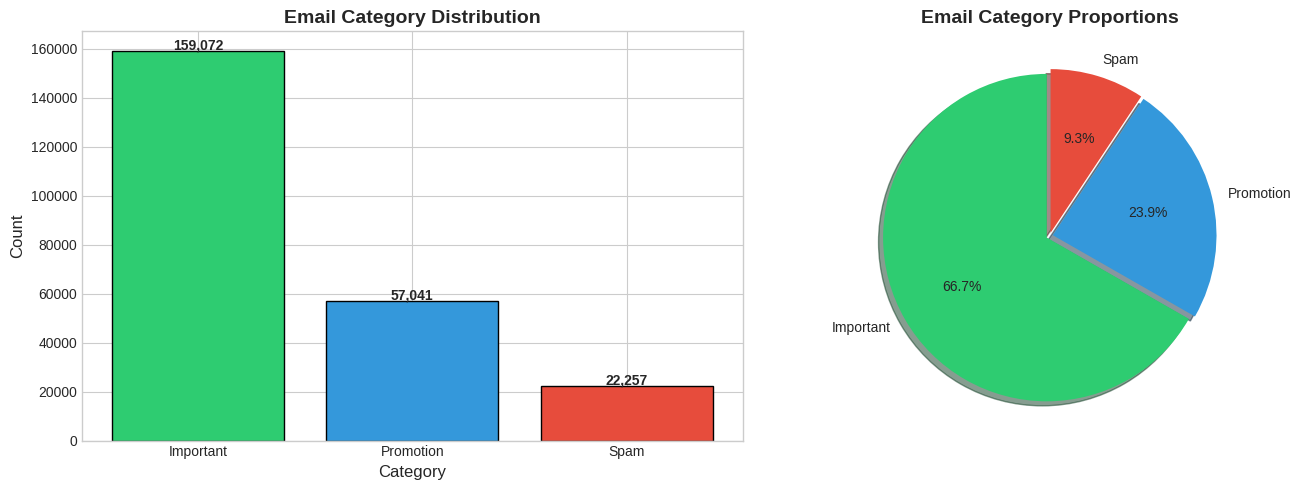

In [ ]:
# Activity 2.2: Visual Analysis – Category Distribution

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar Chart - 4 categories
category_counts = df['category'].value_counts()
colors = ['#e74c3c', '#3498db', '#9b59b6', '#2ecc71']  # Urgent=Red, Financial=Blue, HR=Purple, General=Green
axes[0].bar(category_counts.index, category_counts.values, color=colors, edgecolor='black')
axes[0].set_title('Email Category Distribution (4 Classes)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for i, v in enumerate(category_counts.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontweight='bold')

# Pie Chart - 4 categories
axes[1].pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%',
            colors=colors, explode=(0.02, 0.02, 0.02, 0.02), shadow=True, startangle=90)
axes[1].set_title('Email Category Proportions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Activity 2.3: Univariate Analysis – Email Length

Analyze the distribution of email length using histograms and boxplots.

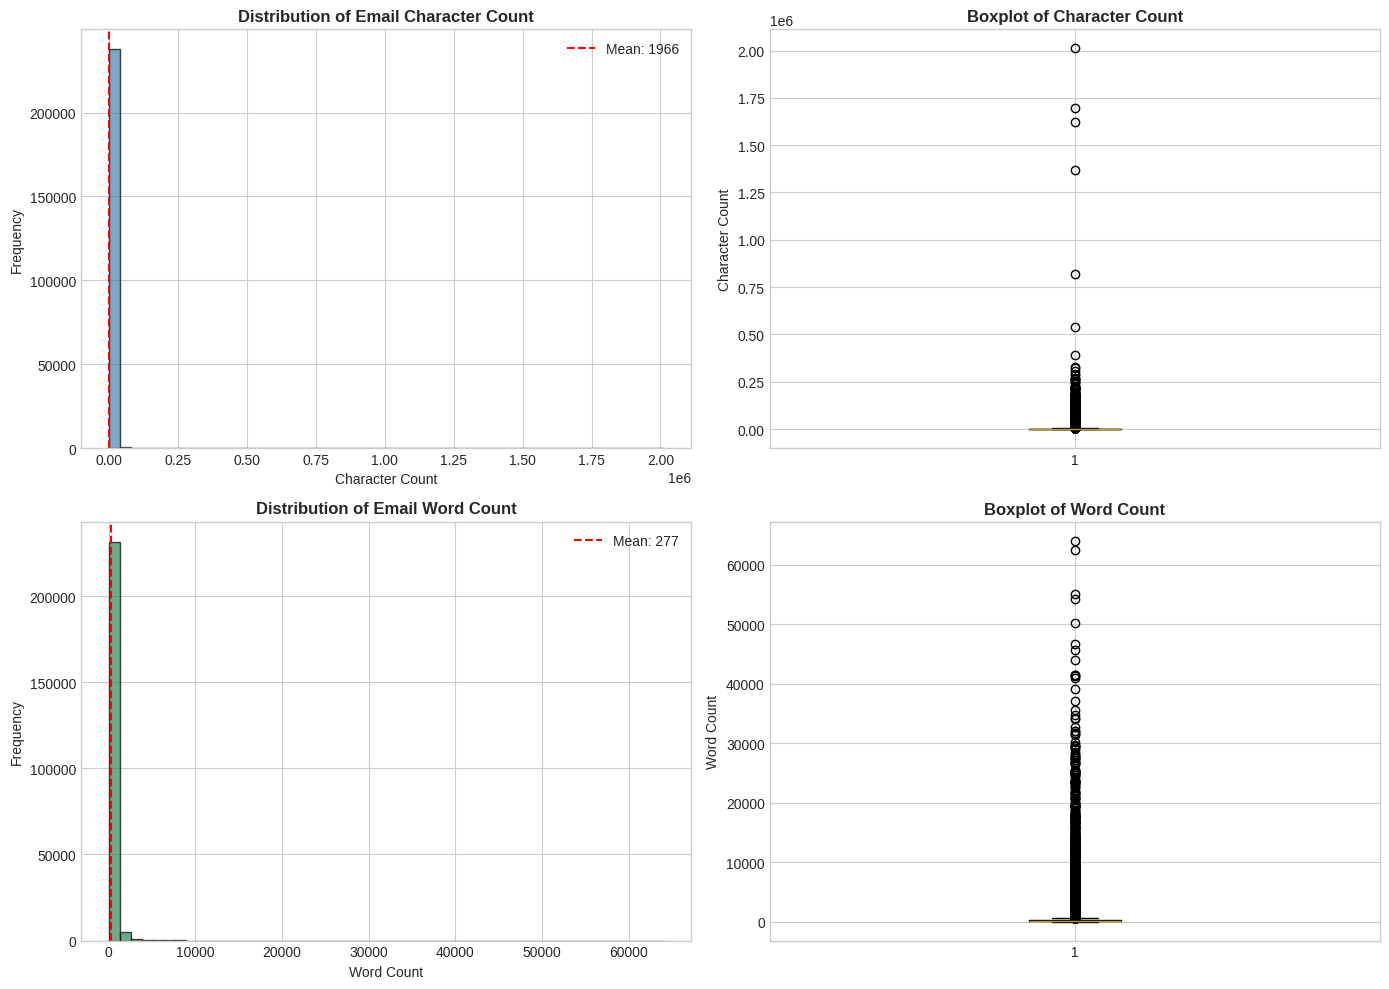

In [11]:
# Activity 2.3: Univariate Analysis – Email Length

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Character Count Histogram
axes[0, 0].hist(df['char_count'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Email Character Count', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['char_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["char_count"].mean():.0f}')
axes[0, 0].legend()

# Character Count Boxplot
axes[0, 1].boxplot(df['char_count'], vert=True)
axes[0, 1].set_title('Boxplot of Character Count', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Character Count')

# Word Count Histogram
axes[1, 0].hist(df['word_count'], bins=50, color='seagreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution of Email Word Count', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Word Count')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["word_count"].mean():.0f}')
axes[1, 0].legend()

# Word Count Boxplot
axes[1, 1].boxplot(df['word_count'], vert=True)
axes[1, 1].set_title('Boxplot of Word Count', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Word Count')

plt.tight_layout()
plt.show()

## Activity 2.4: Bivariate Analysis – Length vs Category

Compare email length across different categories.

/tmp/ipython-input-1560346971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='char_count', palette='Set2', ax=axes[0])
/tmp/ipython-input-1560346971.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='word_count', palette='Set2', ax=axes[1])


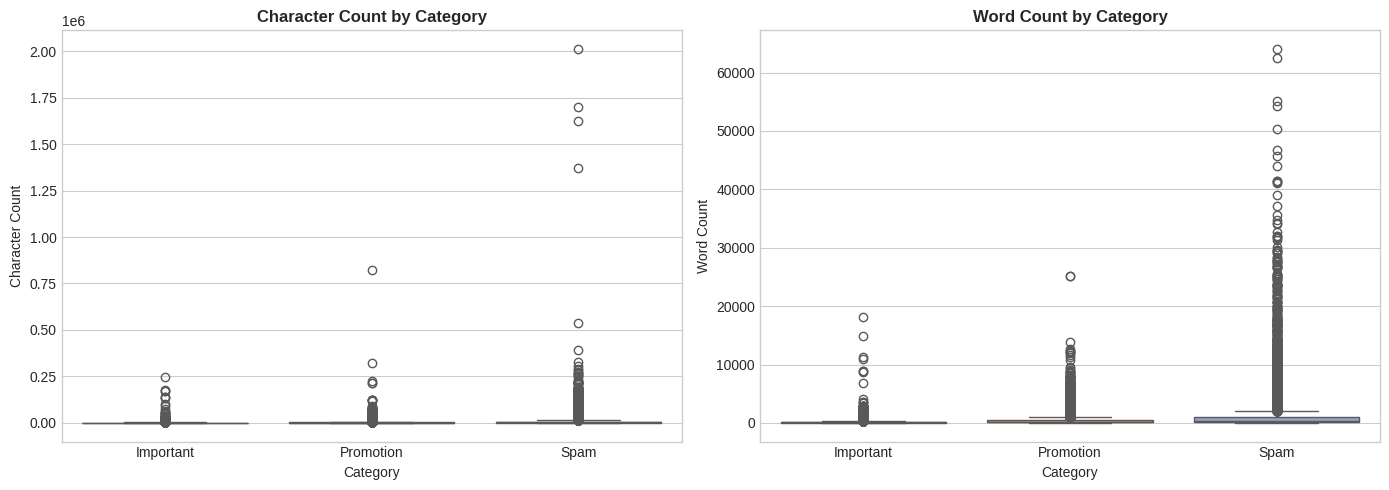


📊 Average Email Length by Category:
           char_count  word_count
category                         
Important      926.67      134.90
Promotion     2719.17      391.89
Spam          7467.43      995.87


In [12]:
# Activity 2.4: Bivariate Analysis – Length vs Category

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character Count by Category
sns.boxplot(data=df, x='category', y='char_count', palette='Set2', ax=axes[0])
axes[0].set_title('Character Count by Category', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Character Count')

# Word Count by Category
sns.boxplot(data=df, x='category', y='word_count', palette='Set2', ax=axes[1])
axes[1].set_title('Word Count by Category', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Word Count')

plt.tight_layout()
plt.show()

# Statistics by category
print('\n📊 Average Email Length by Category:')
print(df.groupby('category')[['char_count', 'word_count']].mean().round(2))

---
# ⚙️ Milestone 3: Text Preprocessing & Feature Extraction

This milestone covers:
- Text preprocessing (lowercase, punctuation removal, stopwords, lemmatization)
- TF-IDF vectorization

## Activity 3.1: Text Preprocessing Function

Create a comprehensive text preprocessing function that:
- Converts text to lowercase
- Removes punctuation and special characters
- Removes stopwords
- Applies lemmatization

In [13]:
# Activity 3.1: Text Preprocessing Function

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Comprehensive text preprocessing:
    1. Convert to lowercase
    2. Remove punctuation and special characters
    3. Remove stopwords
    4. Apply lemmatization
    """
    if pd.isna(text):
        return ''

    # Convert to lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize
    tokens = text.split()

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]

    return ' '.join(tokens)

# Apply preprocessing
print('🔄 Preprocessing email text...')
df['clean_text'] = df['email_body'].apply(preprocess_text)

# Remove emails with empty clean text
df = df[df['clean_text'].str.len() > 0]

print('✅ Text preprocessing complete!')
print(f'\n📊 Final dataset size: {len(df):,} emails')

# Show example
print('\n📝 Example - Before and After Preprocessing:')
print(f'\nOriginal: {df["email_body"].iloc[0][:200]}...')
print(f'\nCleaned: {df["clean_text"].iloc[0][:200]}...')

🔄 Preprocessing email text...
✅ Text preprocessing complete!

📊 Final dataset size: 238,018 emails

📝 Example - Before and After Preprocessing:

Original: Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without...

Cleaned: traveling business meeting take fun trip especially prepare presentation would suggest holding business plan meeting take trip without formal business meeting would even try get honest opinion whether...


## Activity 3.2: TF-IDF Vectorization

Convert the preprocessed text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency).

In [14]:
# Activity 3.2: TF-IDF Vectorization

# Create TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,      # Maximum vocabulary size
    ngram_range=(1, 2),     # Unigrams and bigrams
    min_df=5,               # Minimum document frequency
    max_df=0.95             # Maximum document frequency
)

# Fit and transform the text data
print('🔄 Applying TF-IDF Vectorization...')
X = tfidf_vectorizer.fit_transform(df['clean_text'])
y = df['category']

print('✅ TF-IDF Vectorization complete!')
print(f'\n📊 Feature Matrix Shape: {X.shape}')
print(f'📊 Vocabulary Size: {len(tfidf_vectorizer.get_feature_names_out())}')
print(f'\n📝 Sample Features (first 20):')
print(tfidf_vectorizer.get_feature_names_out()[:20])

🔄 Applying TF-IDF Vectorization...
✅ TF-IDF Vectorization complete!

📊 Feature Matrix Shape: (238018, 5000)
📊 Vocabulary Size: 5000

📝 Sample Features (first 20):
['aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'
 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'
 'aaron' 'ability' 'able' 'able get' 'absence' 'absolutely' 'accept'
 'acceptable' 'acceptance' 'acceptance create' 'accepted' 'access'
 'accord' 'accordance' 'according' 'accordingly' 'account' 'accountant']


---
# 🤖 Milestone 4: Model Building & Evaluation

This milestone covers:
- Train-test split
- Logistic Regression model training
- Model evaluation (accuracy, classification report, confusion matrix)

## Activity 4.1: Train-Test Split

Split the data into training (70%) and testing (30%) sets.

In [15]:
# Activity 4.1: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print('=' * 60)
print('📊 TRAIN-TEST SPLIT')
print('=' * 60)
print(f'\n🔹 Training Set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(df)*100:.1f}%)')
print(f'🔹 Testing Set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(df)*100:.1f}%)')

print('\n📊 Training Set Distribution:')
print(y_train.value_counts())

print('\n📊 Testing Set Distribution:')
print(y_test.value_counts())

📊 TRAIN-TEST SPLIT

🔹 Training Set: 166,612 samples (70.0%)
🔹 Testing Set: 71,406 samples (30.0%)

📊 Training Set Distribution:
category
Important    111109
Promotion     39924
Spam          15579
Name: count, dtype: int64

📊 Testing Set Distribution:
category
Important    47619
Promotion    17110
Spam          6677
Name: count, dtype: int64


## Activity 4.2: Logistic Regression Model Training

Train a Logistic Regression classifier on the training data.

In [16]:
# Activity 4.2: Logistic Regression Model Training

print('🔄 Training Logistic Regression Model...')

# Create and train the model
model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)

model.fit(X_train, y_train)

print('✅ Model training complete!')

# Make predictions
y_pred = model.predict(X_test)

🔄 Training Logistic Regression Model...
✅ Model training complete!


## Activity 4.3: Model Evaluation

Evaluate the model using:
- Accuracy Score
- Classification Report (Precision, Recall, F1-Score)
- Confusion Matrix

In [17]:
# Activity 4.3: Model Evaluation

print('=' * 60)
print('📊 MODEL EVALUATION')
print('=' * 60)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'\n🎯 Model Accuracy: {accuracy:.2%}')

# Classification Report
print('\n📋 Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\n🔢 Confusion Matrix:')
print(cm)

📊 MODEL EVALUATION

🎯 Model Accuracy: 92.79%

📋 Classification Report:
              precision    recall  f1-score   support

   Important       0.97      0.96      0.96     47619
   Promotion       0.90      0.86      0.88     17110
        Spam       0.74      0.87      0.80      6677

    accuracy                           0.93     71406
   macro avg       0.87      0.90      0.88     71406
weighted avg       0.93      0.93      0.93     71406


🔢 Confusion Matrix:
[[45674  1106   839]
 [ 1093 14781  1236]
 [  384   490  5803]]


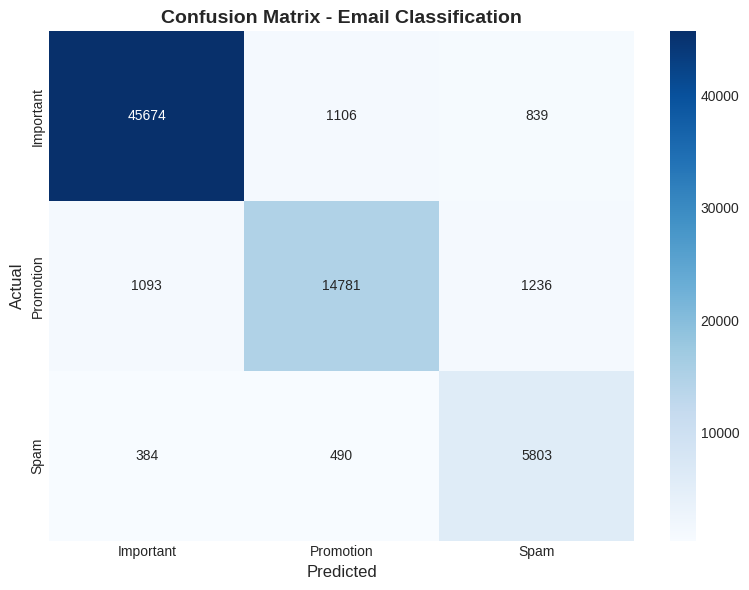

In [18]:
# Confusion Matrix Visualization

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix - Email Classification', fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.tight_layout()
plt.show()

---
# 🧪 Milestone 5: Testing & Saving the Model

This milestone covers:
- Testing with new emails
- Saving the model and vectorizer

## Activity 5.1: Testing with New Emails

Test the trained model with new sample emails.

In [ ]:
# Activity 5.1: Testing with New Emails

def predict_email_category(email_text):
    """
    Predict the category of a new email.
    """
    # Preprocess the email
    clean_email = preprocess_text(email_text)

    # Transform using the trained vectorizer
    email_vector = tfidf_vectorizer.transform([clean_email])

    # Predict
    prediction = model.predict(email_vector)[0]
    probabilities = model.predict_proba(email_vector)[0]

    return prediction, dict(zip(model.classes_, probabilities))

# Test emails for 4 categories: Urgent, Financial, HR, General
test_emails = [
    "URGENT: Server is down! Need immediate action to restore services. This is critical!",
    "Please review the Q3 financial report. Budget allocation needs approval for the next fiscal year.",
    "HR Department: New employee onboarding scheduled for Monday. Please complete the training documentation.",
    "Team meeting rescheduled to Thursday. Let me know if you can attend.",
    "ASAP: Client deadline is tomorrow! We need to finalize the proposal immediately."
]

print('=' * 60)
print('🧪 TESTING WITH NEW EMAILS (4 Categories)')
print('=' * 60)

for i, email in enumerate(test_emails, 1):
    prediction, probs = predict_email_category(email)
    print(f'\n📧 Email {i}: "{email[:60]}..."')
    print(f'   🏷️ Predicted Category: {prediction}')
    print(f'   📊 Confidence: {max(probs.values()):.2%}')

🧪 TESTING WITH NEW EMAILS

📧 Email 1: "Congratulations! You have won a $1,000,000 lottery. Click he..."
   🏷️ Predicted Category: Spam
   📊 Confidence: 99.06%

📧 Email 2: "Special offer! Get 50% discount on all products. Limited tim..."
   🏷️ Predicted Category: Promotion
   📊 Confidence: 88.55%

📧 Email 3: "Meeting scheduled for tomorrow at 10 AM to discuss the quart..."
   🏷️ Predicted Category: Important
   📊 Confidence: 95.42%

📧 Email 4: "Your account password has expired. Click here to verify your..."
   🏷️ Predicted Category: Spam
   📊 Confidence: 53.41%

📧 Email 5: "Please review the attached contract before the client meetin..."
   🏷️ Predicted Category: Important
   📊 Confidence: 96.41%


## Activity 5.2: Saving Model & Vectorizer

Save the trained model and TF-IDF vectorizer using pickle for future use.

In [22]:
# Activity 5.2: Saving Model & Vectorizer

# Save the model
with open('email_classifier_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

print('=' * 60)
print('💾 MODEL SAVED SUCCESSFULLY')
print('=' * 60)
print('\n✅ Saved files:')
print('   📁 email_classifier_model.pkl')
print('   📁 tfidf_vectorizer.pkl')

# Download files (for Google Colab)
from google.colab import files
files.download('email_classifier_model.pkl')
files.download('tfidf_vectorizer.pkl')

print('\n📥 Files downloaded to your computer!')

💾 MODEL SAVED SUCCESSFULLY

✅ Saved files:
   📁 email_classifier_model.pkl
   📁 tfidf_vectorizer.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


📥 Files downloaded to your computer!


In [24]:
from sklearn.model_selection import cross_val_score, GridSearchCV

print('=' * 60)
print('📊 ACTIVITY 6.1: CROSS-VALIDATION')
print('=' * 60)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print(f'\n🔄 5-Fold Cross-Validation Results:')
print(f'   Fold Scores: {cv_scores.round(4)}')
print(f'   Mean Accuracy: {cv_scores.mean():.4f}')
print(f'   Std Deviation: {cv_scores.std():.4f}')


📊 ACTIVITY 6.1: CROSS-VALIDATION

🔄 5-Fold Cross-Validation Results:
   Fold Scores: [0.9254 0.9238 0.9225 0.9246 0.9234]
   Mean Accuracy: 0.9239
   Std Deviation: 0.0010


In [25]:
# ============================================================
# Activity 6.2: Hyperparameter Tuning with GridSearchCV
# ============================================================

print('\n' + '=' * 60)
print('⚙️ ACTIVITY 6.2: HYPERPARAMETER TUNING (GridSearchCV)')
print('=' * 60)

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

print('\n🔍 Hyperparameter Grid:')
print(param_grid)


⚙️ ACTIVITY 6.2: HYPERPARAMETER TUNING (GridSearchCV)

🔍 Hyperparameter Grid:
{'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga'], 'max_iter': [1000]}


In [27]:
# Define lighter hyperparameter grid (faster)
param_grid = {
    'C': [0.1, 1, 10],
    'max_iter': [1000]
}

print('\n🔍 Hyperparameter Grid:')
print(param_grid)

# Create GridSearchCV object
print('\n🔄 Running GridSearchCV (this may take a few minutes)...')
grid_search = GridSearchCV(
    LogisticRegression(class_weight='balanced', random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

print('\n✅ GridSearchCV Complete!')
print(f'\n🏆 Best Parameters: {grid_search.best_params_}')
print(f'🎯 Best CV Score: {grid_search.best_score_:.4f}')

# Evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f'\n📊 Best Model Test Accuracy: {best_accuracy:.2%}')
print(f'\n📋 Classification Report (Optimized Model):')
print(classification_report(y_test, y_pred_best))


🔍 Hyperparameter Grid:
{'C': [0.1, 1, 10], 'max_iter': [1000]}

🔄 Running GridSearchCV (this may take a few minutes)...
Fitting 3 folds for each of 3 candidates, totalling 9 fits

✅ GridSearchCV Complete!

🏆 Best Parameters: {'C': 10, 'max_iter': 1000}
🎯 Best CV Score: 0.9346

📊 Best Model Test Accuracy: 94.02%

📋 Classification Report (Optimized Model):
              precision    recall  f1-score   support

   Important       0.98      0.97      0.97     47619
   Promotion       0.92      0.89      0.90     17110
        Spam       0.76      0.88      0.82      6677

    accuracy                           0.94     71406
   macro avg       0.89      0.91      0.90     71406
weighted avg       0.94      0.94      0.94     71406



In [28]:
# ============================================================
# 🔧 Milestone 6: Model Optimization
# ============================================================

# Activity 6.1: Cross-Validation# Compare with original model
print('=' * 60)
print('📈 MODEL COMPARISON')
print('=' * 60)
print(f'   Original Model Accuracy: {accuracy:.2%}')
print(f'   Optimized Model Accuracy: {best_accuracy:.2%}')
print(f'   Improvement: {(best_accuracy - accuracy) * 100:.2f}%')



📈 MODEL COMPARISON
   Original Model Accuracy: 92.79%
   Optimized Model Accuracy: 94.02%
   Improvement: 1.23%


---
# ✅ Conclusion

## Project Summary

This Email Classification System for Organizational Efficiency successfully demonstrates:

### 🎯 Achievements
- ✅ Loaded and preprocessed the Enron Email Dataset (500K+ emails)
- ✅ Performed comprehensive EDA with visualizations
- ✅ Applied text preprocessing (lowercase, stopwords removal, lemmatization)
- ✅ Extracted features using TF-IDF Vectorization
- ✅ Trained a Logistic Regression classifier
- ✅ Evaluated model performance with accuracy, classification report, and confusion matrix
- ✅ Tested model with new sample emails
- ✅ Saved model and vectorizer for deployment

### 📊 Tech Stack
| Component | Technology |
|-----------|------------|
| Dataset | Enron Email Dataset (Kaggle) |
| Categories | **Urgent, Financial, HR, General** (4 Classes) |
| Libraries | pandas, numpy, scikit-learn, nltk, matplotlib, seaborn |
| Model | Logistic Regression |
| Feature Extraction | TF-IDF Vectorizer |

### 🏢 Organizational Impact
The deployment of this system in a corporate environment can significantly streamline communication workflows, ensuring that:
- **Urgent** emails are highlighted and responded to swiftly
- **Financial** matters are routed to appropriate departments
- **HR** communications are properly tracked
- **General** queries are handled efficiently

### 🚀 Future Enhancements
- Integrate with real-time notification systems
- Expand categorization capabilities to include custom tags
- Connect with Gmail/Outlook APIs for live email classification
- Implement deep learning approaches (LSTM, BERT)

---
**📧 Email Classification System for Organizational Efficiency - Complete!**

SyntaxError: invalid syntax (ipython-input-4204858121.py, line 3)

In [ ]:
## Activity 1.2: Creating the Dataset

Download the Enron Email Dataset from Kaggle using the Kaggle API.

**Steps:**
1. Upload your `kaggle.json` file (get it from Kaggle → Account → Create New API Token)
2. Download and extract the dataset

# Activity 1.2: Creating the Dataset - Download from Kaggle

# Step 1: Install Kaggle API
!pip install -q kaggle

# Step 2: Upload your kaggle.json file
from google.colab import files
print("📁 Please upload your kaggle.json file:")
uploaded = files.upload()

# Step 3: Setup Kaggle credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 4: Download Enron Email Dataset from Kaggle
print("\n📥 Downloading Enron Email Dataset...")
!kaggle datasets download -d wcukierski/enron-email-dataset

# Step 5: Unzip the dataset
!unzip -q -o enron-email-dataset.zip

print("\n✅ Enron Email Dataset downloaded and extracted successfully!")

# Activity 1.3: Read & Inspect the Dataset

# Load the Enron email dataset
df_raw = pd.read_csv('emails.csv')

# Display basic information
print("=" * 60)
print("📊 DATASET OVERVIEW")
print("=" * 60)

print(f"\n📐 Shape: {df_raw.shape[0]:,} rows × {df_raw.shape[1]} columns")

print("\n📋 Columns:", df_raw.columns.tolist())

print("\n📝 Data Types:")
print(df_raw.dtypes)

print("\n🔍 First 5 Rows:")
df_raw.head()

## Activity 1.4: Data Preparation

Extract the raw email body text from the 'message' column.

The raw email contains headers (From, To, Subject, Date) and the actual body. We need to:
1. Extract only the body text (after the headers)
2. Create category labels using rule-based classification:
   - **Spam**: Contains keywords like "winner", "claim", "verify account", "click here"
   - **Promotion**: Contains keywords like "offer", "discount", "sale", "promo", "deal"
   - **Important**: Default category for business emails

# Activity 1.4: Data Preparation - Extract Email Body & Create Categories

def extract_email_body(message):
    """
    Extract the body content from raw email message.
    Email body starts after the headers (separated by double newline).
    """
    try:
        if pd.isna(message):
            return ""
        # Split by double newline to separate headers from body
        parts = str(message).split('\n\n', 1)
        if len(parts) > 1:
            return parts[1].strip()
        return str(message).strip()
    except:
        return ""

def classify_email(text):
    """
    Rule-based classification of emails into categories.

    Categories:
    - Spam: Suspicious/scam keywords
    - Promotion: Marketing/sales keywords
    - Important: Default for business communications
    """
    if pd.isna(text) or text == "":
        return 'Important'

    text_lower = str(text).lower()

    # Spam indicators (check first - highest priority)
    spam_keywords = [
        'winner', 'won', 'lottery', 'claim your prize', 'million dollars',
        'click here', 'verify your account', 'verify account', 'password expired',
        'nigerian', 'prince', 'urgent action required', 'act now', 'limited time',
        'free money', 'congratulations you', 'you have been selected',
        'credit card', 'social security', 'wire transfer'
    ]
    if any(keyword in text_lower for keyword in spam_keywords):
        return 'Spam'

    # Promotion indicators
    promo_keywords = [
        'discount', 'sale', 'offer', 'promo', 'promotion', 'deal',
        'free trial', 'subscribe', 'buy now', 'save', 'coupon',
        'special offer', 'limited offer', 'exclusive', 'best price',
        'order now', 'shop now', 'clearance', 'bonus'
    ]
    if any(keyword in text_lower for keyword in promo_keywords):
        return 'Promotion'

    # Default to Important (business emails)
    return 'Important'

# Create a copy of the dataframe
df = df_raw.copy()

# Extract email body
print("📧 Extracting email body text...")
df['email_body'] = df['message'].apply(extract_email_body)

# Classify emails
print("🏷️ Classifying emails into categories...")
df['category'] = df['email_body'].apply(classify_email)

print("\n✅ Data preparation complete!")
print(f"\n📊 Category Distribution (Full Dataset):")
print(df['category'].value_counts())

## Activity 1.5: Handling Missing Values

Check for and handle any missing values in the dataset.

In [ ]:
# Activity 1.5: Handling Missing Values

print("=" * 60)
print("🔍 MISSING VALUES ANALYSIS")
print("=" * 60)

# Check missing values
print("\n📊 Missing Values per Column:")
print(df.isnull().sum())

print(f"\n📈 Total Missing Values: {df.isnull().sum().sum()}")

# Remove rows with empty email body
initial_count = len(df)
df = df[df['email_body'].str.len() > 0]
df = df.dropna(subset=['email_body'])

print(f"\n🗑️ Removed {initial_count - len(df):,} rows with empty email body")
print(f"✅ Remaining rows: {len(df):,}")

## Activity 1.6: Handling Duplicates

Identify and remove duplicate emails to ensure data quality.

In [ ]:
# Activity 1.6: Handling Duplicates

print("=" * 60)
print("🔄 DUPLICATE ANALYSIS")
print("=" * 60)

# Check for duplicates
duplicates = df.duplicated(subset=['email_body']).sum()
print(f"\n📊 Duplicate emails found: {duplicates:,}")

# Remove duplicates
initial_count = len(df)
df = df.drop_duplicates(subset=['email_body'], keep='first')

print(f"🗑️ Removed {initial_count - len(df):,} duplicate emails")
print(f"✅ Remaining unique emails: {len(df):,}")

## Activity 1.7: Checking for Outliers

Analyze email length (characters and word count) to identify potential outliers.

Very short emails might be incomplete, while extremely long emails could skew the analysis.

In [ ]:
# Activity 1.7: Checking for Outliers (Email Length)

# Calculate email length metrics
df['char_count'] = df['email_body'].apply(len)
df['word_count'] = df['email_body'].apply(lambda x: len(str(x).split()))

print("=" * 60)
print("📏 EMAIL LENGTH ANALYSIS")
print("=" * 60)

print("\n📊 Character Count Statistics:")
print(df['char_count'].describe())

print("\n📊 Word Count Statistics:")
print(df['word_count'].describe())

# Identify outliers using IQR method
Q1_char = df['char_count'].quantile(0.25)
Q3_char = df['char_count'].quantile(0.75)
IQR_char = Q3_char - Q1_char

lower_bound = Q1_char - 1.5 * IQR_char
upper_bound = Q3_char + 1.5 * IQR_char

outliers = df[(df['char_count'] < lower_bound) | (df['char_count'] > upper_bound)]
print(f"\n⚠️ Outliers detected (IQR method): {len(outliers):,} emails")

# Remove very short emails (less than 50 characters)
initial_count = len(df)
df = df[df['char_count'] >= 50]
print(f"🗑️ Removed {initial_count - len(df):,} very short emails (< 50 chars)")
print(f"✅ Final dataset size: {len(df):,} emails")